In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('books.csv')

In [4]:
data.describe()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn13,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,NonEnglish
count,399.000000,3.990000e+02,3.990000e+02,3.990000e+02,399.000000,3.890000e+02,399.000000,399.000000,3.990000e+02,3.990000e+02,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.0
mean,4629.112782,6.202994e+06,6.403616e+06,1.003106e+07,52.273183,9.780736e+12,1998.583960,3.983784,5.856697e+04,6.338527e+04,3602.338346,1654.025063,3349.325815,12326.313283,22040.551378,24015.055138,0.0
std,2888.079524,8.537331e+06,8.707742e+06,1.371054e+07,85.456787,5.929345e+08,24.656379,0.221447,1.451770e+05,1.504474e+05,5686.207540,5975.077674,9808.978148,28852.230403,49404.841679,61550.253387,0.0
min,15.000000,3.860000e+02,3.860000e+02,1.615000e+03,1.000000,9.780007e+12,1791.000000,3.130000,3.799000e+03,8.401000e+03,57.000000,36.000000,125.000000,797.000000,2312.000000,1676.000000,0.0
25%,2158.500000,4.472250e+04,4.705950e+04,9.427875e+05,20.000000,9.780316e+12,1997.000000,3.830000,1.264800e+04,1.425700e+04,1073.500000,247.000000,670.000000,2951.500000,5295.500000,5002.500000,0.0
50%,4536.000000,5.342550e+05,5.865160e+05,2.501119e+06,32.000000,9.780554e+12,2006.000000,4.000000,2.007500e+04,2.333000e+04,1849.000000,471.000000,1232.000000,4754.000000,8242.000000,8035.000000,0.0
75%,7187.500000,1.139371e+07,1.184219e+07,1.632323e+07,55.000000,9.781250e+12,2011.000000,4.140000,4.478050e+04,4.723050e+04,3592.500000,1077.500000,2343.500000,9444.500000,17247.500000,17425.000000,0.0
max,9968.000000,3.184552e+07,3.184552e+07,5.072324e+07,834.000000,9.784770e+12,2016.000000,4.530000,1.972666e+06,2.024493e+06,49714.000000,100373.000000,149549.000000,355756.000000,656870.000000,875372.000000,0.0


In [5]:
data["original_title"].isnull().sum()

36

In [6]:
data['book_id'].nunique()

399

In [13]:
data['title'].nunique()

399

In [7]:
data['average_rating'].sum()/399

3.9837844611528817

In [8]:
data['original_publication_year'].value_counts().get(2000.0,0)

8

In [9]:
data['work_ratings_count'].max()

2024493

In [11]:
max_rating_index = data['work_ratings_count'].idxmax()
data.loc[max_rating_index, 'title']

'The Diary of a Young Girl'

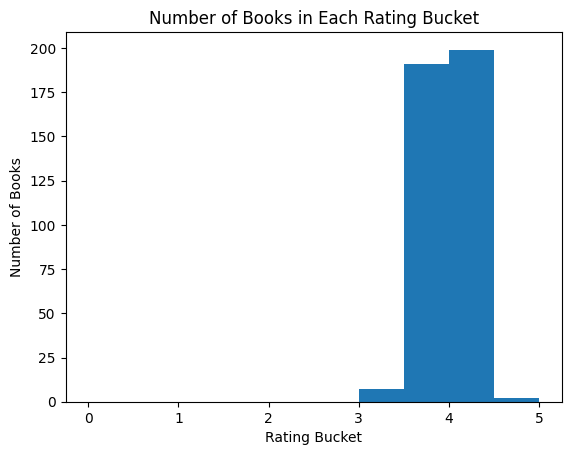

In [12]:
bins = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


data['rating_bucket'] = pd.cut(data['average_rating'], bins, right=False, labels=bins[:-1])


bucket_counts = data['rating_bucket'].value_counts().sort_index()


plt.bar(bucket_counts.index, bucket_counts.values, width=0.5, align='edge')
plt.xlabel('Rating Bucket')
plt.ylabel('Number of Books')
plt.title('Number of Books in Each Rating Bucket')
plt.show()